In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2 as cv
import matplotlib.pyplot as plt
from keras.applications import vgg16
from keras.models import Model,load_model
import keras
from keras.layers import Input, Conv2D, Conv2DTranspose,AveragePooling2D, MaxPooling2D,UpSampling2D,LeakyReLU, concatenate, Dropout,BatchNormalization,Activation
from keras.callbacks import EarlyStopping,ModelCheckpoint
import pandas as pd
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from numpy.random import seed
seed(123)
import tensorflow.compat.v1 as tf
tf.set_random_seed(123)
# from keras import backend as K
# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)
#print(os.listdir("../input/"))
InputPath = "./data/train/"

/Users/chenwu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
print(os.listdir(InputPath))

['.DS_Store', 'label', 'img']


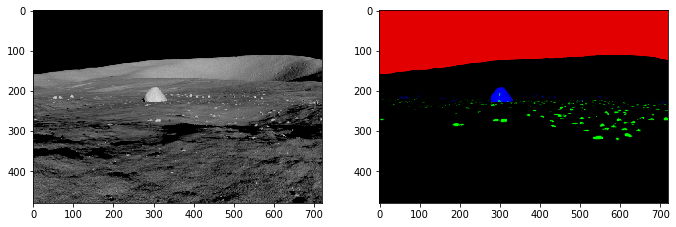

In [12]:
plt.figure(figsize=(30,30))
plt.subplot(5,5,1)
img = cv.imread(InputPath+"img/render0001.png")  
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.subplot(5,5,1+1)
img = cv.imread(InputPath+"label/ground0001.png")  
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
#plt.subplot(5,5,1+2)
# img = cv.imread(InputPath+"clean/clean0001.png")  
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#plt.imshow(img)

In [13]:
def ExtractData(InputPath):
    SourceImg = sorted(os.listdir(InputPath+'img'))
    TargetImg = sorted(os.listdir(InputPath+'label'))
    X_=[]
    y_=[]
    count=0
    for i in range(len(SourceImg)):
        if count<2165:
            count=count+1
            img_1 = cv.imread(InputPath + 'img/'+SourceImg[i])
            img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
            img_1 = cv.resize(img_1,(500,500))
            X_.append(img_1)
            img_2 = cv.imread(InputPath + 'label/'+TargetImg[i])
            img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
            img_2 = cv.resize(img_2,(500,500))
            y_.append(img_2)
    X_ = np.array(X_)
    y_ = np.array(y_)
    
    return X_,y_

In [14]:
X_,y_ = ExtractData(InputPath)

In [16]:
X_.shape, y_.shape

((999, 500, 500, 3), (999, 500, 500, 3))

In [5]:
train_generator()

<generator object train_generator at 0x13a0c0468>

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

import torch
from torch.autograd import Variable
from __future__ import print_function
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataset import Dataset
import torch.optim as optim
from torch.nn import init
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import save_image

In [ ]:
import os
import tensorflow as tf
import numpy as np
import scipy
import cv2
from tensorflow.keras.callbacks import TensorBoard

from model import MyModel
from dataload import handle_data
from config import num_epochs, learning_rate, batch_size, weight_path, image_shape, train_dir
from dataload import train_generator
from deeplab import DeepLabV3Plus

tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir='logs/{}'.format("demo"),
    histogram_freq=1, batch_size=32,
    write_graph=True, write_grads=False, write_images=True,
    embeddings_freq=0, embeddings_layer_names=None,
    embeddings_metadata=None, embeddings_data=None, update_freq=500
)

# 生成检查点，可以每一轮保存一次参数， 不用训练完再保存
checkpoint = tf.keras.callbacks.ModelCheckpoint(weight_path+'fcn_20191021.ckpt',monitor='loss', 
                                                    save_weights_only=True,verbose=1,
                                                    save_best_only=True,save_freq='epoch',mode = 'min')
                                                    

# 生成训练数据集
train_list_dir = os.listdir(train_dir)
train_dataset = tf.data.Dataset.from_generator(
    train_generator, (tf.float32, tf.float32), 
    (tf.TensorShape([None, None, None]), tf.TensorShape([None, None, None])))

train_dataset = train_dataset.shuffle(buffer_size=len(train_list_dir))
train_dataset = train_dataset.batch(batch_size)

model = DeepLabV3Plus(image_shape[0], image_shape[1], nclasses=4)
#model = MyModel(3)
# model.load_weights(weight_path+'fcn_20191021')

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, decay=0.0001)
model.compile(
    optimizer=optimizer,
    loss=tf.compat.v2.nn.softmax_cross_entropy_with_logits,
    metrics=['accuracy']
)
model.fit(train_dataset, epochs=num_epochs, callbacks=[tensorboard, checkpoint])
#model.summary()

W0220 16:14:12.599707 4707648960 callbacks.py:1504] `batch_size` is no longer needed in the `TensorBoard` Callback and will be ignored in TensorFlow 2.0.


*** Building DeepLabv3Plus Network ***
*** Output_Shape => (None, 480, 720, 4) ***
Epoch 1/50


In [ ]:
handle_data(train_filenames, train_label_filenames=None)

In [3]:
import tensorflow as tf
import cv2
import os
import scipy
import numpy as np
from config import image_shape, train_dir, train_label_dir, test_dir
from scipy import *


In [70]:
gt_image = scipy.misc.imresize(scipy.misc.imread('/Users/chenwu/Downloads/artificial-lunar-rocky-landscape-dataset/images/ground/ground0012.png'), (480,720))
gt_image.shape

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


(480, 720, 3)

In [16]:
gt_image = np.where(gt_image!=0,255,gt_image)

In [17]:
import matplotlib.pyplot as plt

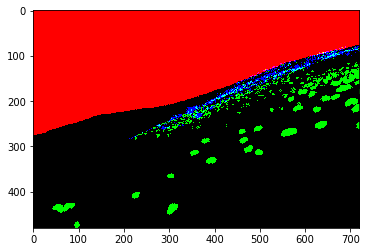

In [71]:
plt.imshow(np.where(gt_image!=0,255,gt_image))

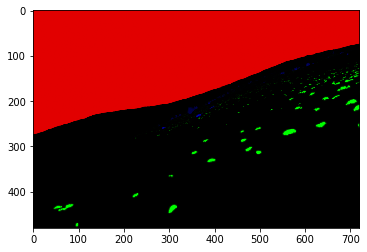

In [72]:
plt.imshow(gt_image) 

In [68]:
mask = np.where((gt_image!=0) & (gt_image!=255))# & (gt_image!=226))

In [69]:
mask

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [59]:
for i in range(len(mask[0])):
    print(gt_image[mask[0][i]][mask[1][i]][mask[2][i]])

223
221
221
221
223
224
223
221
221
221
220
203
201
202
201
201
202
201
188
201
201
201
201
202
192
199
201
201
189
198
192
188
171
201
201
202
201
204
219
221
221
221
221
222
221
209
202
201
188
150
150
150
151
137
146
151
151
150
151
107
75
75
84
146
150
114
146
151
136
146
151
151
150
108
74
74
74
71
18
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
18
71
75
74
75
84
146
150
151
188
201
202
201
201
188
201
201
201
176
198
201
202
189
188
201
201
201
176
198
202
201
201
201
209
221
221
221
221
221
221
221
221
223
221
221
217
220
215
202
201
188
151
151
151
151
150
151
151
150
146
84
75
40
2
1
2
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
1
1
1
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
1
1
1
2
2
2
2
2
2
1
2
2
2
2
2
1
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
1
2
2
2
2
2
2
2
2
2
40
75
75
74
75
75
75
75
85
146
150
151
172
201
191
198
201
202
202
215
221
221
221
221
223
223
221
221
221
220
204
198
157
150
151
108
75
75
64
71
60
2
2
2
2
2
2
1
2
2
2
2
2
2
1
2
1
1
1
2
1
2
1
2
2
2
1
1
2
2
1
2
2
2
1

4
200
10
228
5
229
232
235
236
239
241
242
244
245
245
245
246
246
246
247
246
242
240
239
1
236
3
233
215
185
87
9
2
1
1
1
3
10
108
4
218
10
229
6
232
235
237
240
242
242
243
245
245
245
247
246
246
247
247
246
243
241
239
1
237
2
235
1
231
221
210
178
85
2
1
1
1
1
1
1
1
1
1
1
1
2
6
41
1
176
229
2
233
2
236
238
239
241
242
242
244
244
245
246
247
246
247
247
248
247
244
241
239
237
3
235
2
232
227
217
216
167
49
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
15
108
221
235
236
237
240
242
242
242
244
244
245
245
246
1
247
247
247
248
248
248
246
244
239
237
2
236
4
234
229
218
211
137
18
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
10
66
196
235
236
237
240
241
242
242
244
245
246
1
246
1
246
1
247
247
247
247
247
248
247
248
247
242
238
235
1
233
231
227
220
221
214
130
17
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
7
20
140
228
236
238
239
241
241
243
244
244
1
246
1
245
1
246
1
246
1
247
247
247
247
247
248
248
248
247
245
239
236
233
231
229
221
220
203
101
11
1
1
1
1
1
1


1
53
30
22
19
23
24
29
27
13
5
1
1
1
1
2
1
2
1
1
1
1
1
1
1
2
1
2
2
1
4
17
1
37
36
24
18
24
1
23
1
1
1
1
1
2
1
1
2
2
1
2
1
1
1
2
1
1
1
1
1
1
5
9
1
8
1
7
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
5
6
5
1
1
1
1
2
3
2
22
5
28
7
24
3
5
1
1
1
3
1
1
1
1
2
1
2
1
2
1
1
1
2
1
1
1
1
1
1
1
2
1
2
2
1
2
1
2
1
1
1
1
1
1
1
1
38
74
55
54
2
77
13
47
11
39
4
50
25
1
1
1
35
69
71
62
42
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
3
1
1
38
72
45
43
95
115
116
115
117
103
44
1
1
79
114
1
108
117
127
129
131
131
1
136
4
138
5
113
5
50
7
1
10
1
3
1
5
2
2
1
1
1
6
1
13
11
1
7
17
3
14
4
1
4
4
4
14
4
11
6
1
1
1
3
4
1
1
6
22
31
13
12
10
1
1
1
5
23
17
8
1
1
1
1
1
2
2
2
2
2
2
1
2
1
2
1
1
14
24
41
49
47
50
60
42
48
48
48
47
52
50
60
64
43
47
38
21
1
1
1
1
1
4
1
1
10
47
77
84
49
2
3
5
1
1
1
1
1
1
1
1
1
19
151
173
218
227
231
236
245
246
248
248
249
248
249
249
250
250
250
250
250
250
250
1
251
251
251
251
251
251
251

2
1
1
1
1
1
1
1
1
1
1
1
1
1
5
1
4
10
18
18
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
9
1
11
8
18
19
11
10
1
3
3
1
2
1
1
1
3
14
20
10
1
9
16
12
8
4
1
1
30
65
60
38
5
16
72
78
60
38
43
61
33
7
40
76
46
31
31
1
1
1
1
1
1
1
17
43
73
70
64
98
88
41
1
1
23
13
19
65
1
35
20
1
7
12
56
66
57
43
11
1
1
1
1
1
35
41
9
19
19
1
1
1
1
1
1
6
1
6
1
2
2
7
2
1
1
1
1
8
72
204
1
234
1
236
236
1
236
237
238
240
245
249
9
250
7
250
250
251
1
250
1
250
1
251
100
243
181
117
186
28
188
27
187
54
183
84
168
153
56
236
1
249
12
249
23
250
12
251
1
251
251
1
251
251
251
251
251
4
252
16
250
4
250
249
75
237
118
162
91
164
67
171
9
200
211
199
1
157
1
134
1
72
70
66
1
63
64
1
16
1
14
1
25
1
7
1
1
5
22
28
59
61
49
21
18
40
52
68
111
135
149
158
90
9
5
24
41
26
1
10
40
38
33
9
6
7
4
40
64
64
16
1
8
4
12
43
51
57
36
43
51
63
87
80
124
113
52
68
36
1
1
1
1
16
9
33
45
44
34
33
35
55
61
40
61
52
1
1
1
55
96
132
109
73
29
14
26
14
1
1
16
14
71
56
13
1
27
30
1
1
2
5
1
1
1
7
26
48
57
53
40
36


3
1
1
1
1
1
1
15
27
42
132
137
89
61
16
1
1
1
65
149
153
37
1
1
1
1
3
37
83
77
34
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
3
2
2
1
1
1
1
2
1
1
1
1
1
1
7
32
148
189
187
205
194
154
126
75
33
9
2
1
1
1
6
25
61
54
35
9
1
1
1
1
1
1
4
38
41
24
1
1
1
3
6
7
8
7
7
5
3
2
1
1
2
4
6
9
13
12
8
3
2
1
1
2
33
128
230
238
236
232
213
163
74
19
5
1
1
1
1
1
1
1
51
152
141
184
207
208
186
46
1
1
1
1
38
41
12
1
1
1
4
8
8
5
1
1
1
2
3
5
8
8
7
5
3
1
2
4
7
9
10
11
9
7
5
2
1
1
1
1
1
1
1
1
1
1
1
1
2
10
107
228
237
241
240
240
237
224
230
174
55
4
1
1
1
1
1
1
3
40
59
52
19
5
1
1
1
2
1
4
11
22
27
22
20
20
18
13
7
3
1
1
1
1
67
107
141
131
64
59
100
95
25
1
1
2
12
65
229
240
235
233
236
240
201
49
5
1
1
1
14
56
33
147
212
208
180
75
1
1
1
1
1
1
1
1
1
1
1
1
3
6
11
18
36
38
47
20
11
8
3
1
1
1
5
25
44
25
28
27
21
17
12
7
3
1
1
2
8
31
141
137
136
97
112
207
214
206
171
70
4
1
1
1
1
1
1
1
1
1
1
1
1
1
8
37
158
183
167
140
120
94
57
45
8
2
1
1
99
169
182
173
49
1
1
1
1
1
1
2
7
47
190
228
234
187
170
211
160
35
5
1
1
1
1
18
123

1
1
2
6
15
28
35
28
21
16
11
6
3
2
1
1
1
2
5
11
18
26
50
134
183
219
239
239
190
77
39
16
5
1
1
1
1
1
1
1
1
1
3
7
12
15
15
12
12
16
16
13
7
3
1
1
4
13
29
58
82
79
89
122
121
106
96
84
68
78
91
91
76
52
32
16
7
3
1
3
8
16
20
26
48
75
109
136
74
29
11
3
1
3
5
7
8
8
8
11
11
9
6
3
2
1
5
13
31
51
84
105
75
62
41
29
20
14
7
3
1
1
1
1
1
1
1
1
1
1
1
6
14
38
117
176
112
85
56
30
19
10
3
1
1
1
5
13
33
51
64
135
245
251
249
250
252
246
237
155
34
9
1
1
1
2
2
3
4
3
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
5
11
19
27
30
34
41
42
38
34
29
26
28
33
33
29
22
15
7
3
1
1
1
2
3
5
8
15
23
30
32
23
12
5
1
1
4
7
17
25
18
19
22
26
35
20
15
9
5
2
1
1
3
11
44
150
215
236
247
240
229
192
108
70
49
25
8
1
1
1
1
1
1
1
1
1
1
1
1
1
2
11
31
155
242
249
244
238
221
206
168
103
98
56
54
48
10
34
140
208
221
217
252
255
255
254
253
252
247
216
46
12
1
1
3
6
11
17
21
22
24
25
26
26
24
22
19
17
12
7
3
1
1
1
1
1
1
1
1
2
4
7
8
11
16
17
15
11
7
5
7
8
9
6
3
1
1
1
2
5
8
10
11
8
4
1
1
4
10
49
143
184
161
159
133
177
202
183
94
32
17
9
4


In [60]:
gt_bg = np.all(gt_image == background_color, axis=2)
gt_g = np.all(gt_image == ground_color, axis=2)
gt_br = np.all(gt_image == big_rock_color, axis=2)
gt_sr = np.all(gt_image == small_rock_color, axis=2)


In [66]:
gt_bg = gt_bg.reshape(*gt_bg.shape, 1)
gt_g = gt_bg.reshape(*gt_g.shape, 1)
gt_br = gt_bg.reshape(*gt_br.shape, 1)
gt_sr = gt_bg.reshape(*gt_sr.shape, 1)

In [67]:
gt_image = np.concatenate((gt_bg, gt_g, gt_br,gt_sr), axis=2)

In [31]:
from PIL import Image
img = Image.open('data/train/label/ground0001.png')
im = np.asarray(Image.open('data/train/label/ground0001.png'))

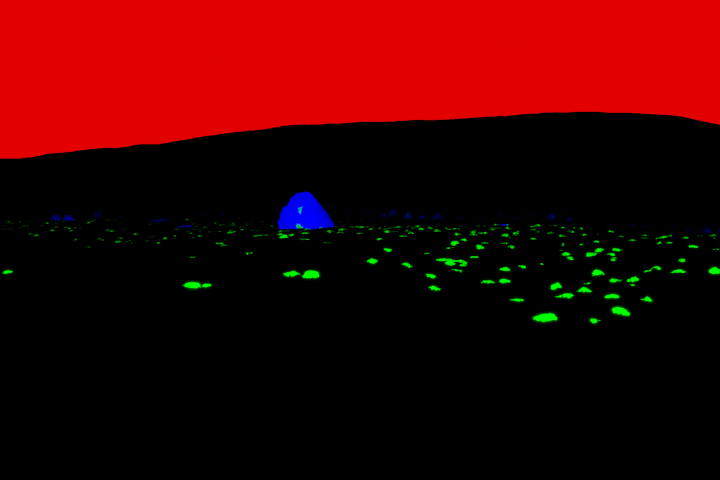

In [32]:
img

In [33]:
im[0][0]

array([226,   0,   0], dtype=uint8)

In [ ]:

        background_color = np.array([255, 0, 0])
        gt_bg = np.all(gt_image == background_color, axis=2)
        gt_bg = gt_bg.reshape(*gt_bg.shape, 1)
        gt_image = np.concatenate((gt_bg, np.invert(gt_bg)), axis=2)

In [17]:
np.where(gt_bg[gt_bg == True])

(array([], dtype=int64),)